In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [2]:
# converting xlsx file to pandas data frame:
trout_sales_df = pd.read_excel('data/trout_sales.xlsx')

In [3]:
trout_sales_df.head()

,date,sales
0,1986-01-01,19761
1,1986-02-01,19083
2,1986-03-01,18664
3,1986-04-01,16354
4,1986-05-01,16013


In [4]:
# convering data to datatime object:
trout_sales_df['date'] = pd.to_datetime(trout_sales_df['date'])

In [5]:
trout_sales_df.head()

,date,sales
0,1986-01-01,19761
1,1986-02-01,19083
2,1986-03-01,18664
3,1986-04-01,16354
4,1986-05-01,16013


In [6]:
# setting index as date:
trout_sales_df.set_index('date', inplace = True)

In [7]:
# selecting a window of interest Jan 1996 - Jan 2000:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
cut_trout_sales_df = trout_sales_df[start_date:end_date]

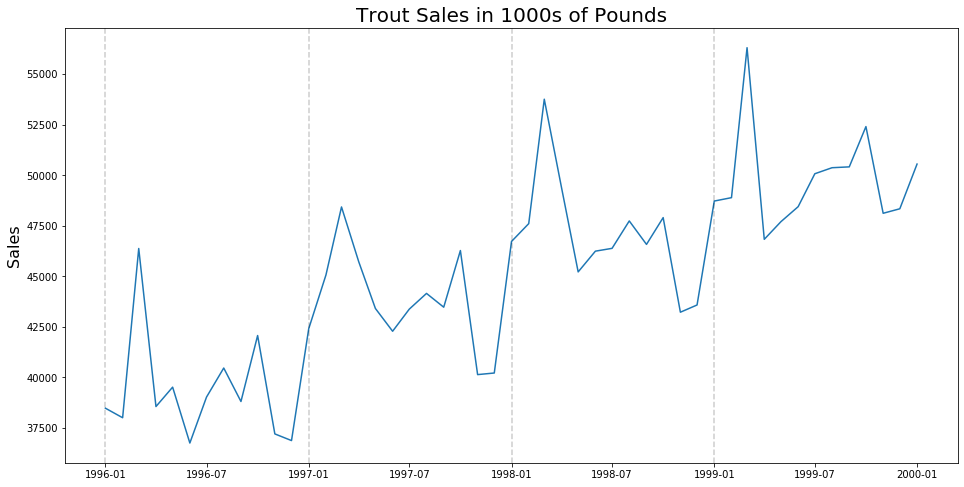

In [8]:
plt.figure(figsize=(16,8))
plt.plot(cut_trout_sales_df)
plt.title('Trout Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [9]:
cut_trout_sales_df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01', '1999-11-01', '1999-12-01',
               '2000-01-01'],
              dtype='datetime64[ns]', name='date', freq=None)

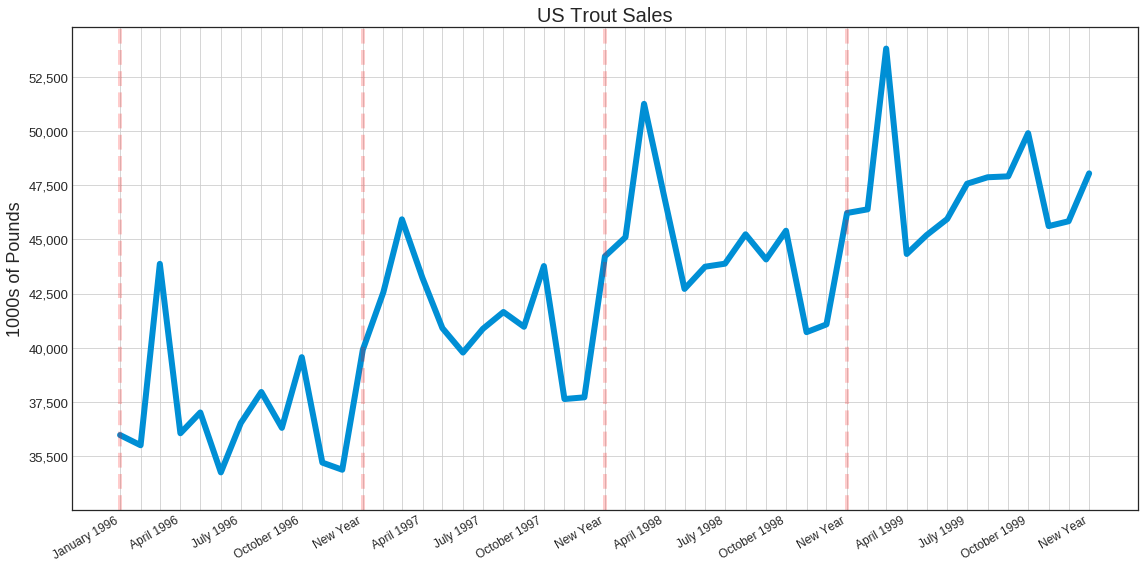

In [10]:
#from matplotlib import pyplot as plt
# print(plt.style.available)
plt.figure(figsize = (16,8))
plt.style.use('seaborn-white')

y = cut_trout_sales_df

plt.plot( y, linewidth = 6, color="#008fd5")

plt.ylabel("1000s of Pounds", size = 18)
plt.yticks([35000,37500,40000,42500,45000,47500,50000,52500,55000],
           ['','35,500','37,500','40,000','42,500','45,000','47,500','50,000','52,500','55,000'], size = 13)
plt.xticks(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01', '1999-11-01', '1999-12-01',
               '2000-01-01'],
           ['January 1996','','','April 1996','','','July 1996','','','October 1996','','','New Year','','','April 1997', '','','July 1997',
            '','','October 1997', '','','New Year', '','','April 1998','','','July 1998',
            '','','October 1998', '','','New Year','','','April 1999', '','','July 1999',
            '','','October 1999', '','','New Year', ''], size = 12)
plt.title("US Trout Sales", size = 20)

plt.gcf().autofmt_xdate()
plt.grid(True)

plt.tight_layout()
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linewidth=4, color='r', linestyle='--', alpha=0.2)
plt.savefig('img/raw_data.png')

plt.show()

# DOCS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html


## **Decomposition:**

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
result = seasonal_decompose(cut_trout_sales_df, model='additive', freq=12)

/home/anton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


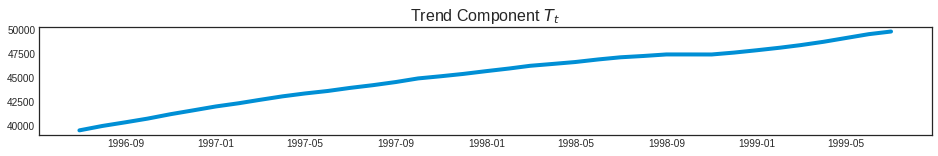

In [13]:
# plotting trend component:
plt.figure(figsize = (16,2))

plt.plot(result.trend,linewidth = 4, color="#008fd5")
plt.title('Trend Component $T_t$', size = 16)
plt.savefig('img/trend_component.png')
#plt.yticks([85000,90000,95000,100000,105000,110000,115000,120000,125000,130000],
#           ['','2,000','3,000','4,000','5,000','6,000','7,000','8,000','9,000','10,000'], size = 12)
#plt.xticks([5,10,15,20,25],
#           ['June 2013','November 2013','April 2014','September 2014','February 2015'], size = 12)

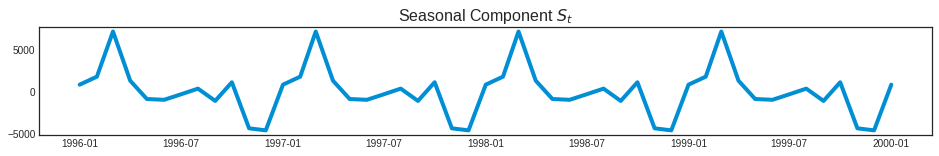

In [14]:
# plotting seasonal component:
plt.figure(figsize = (16,2))

plt.plot(result.seasonal,linewidth = 4, color="#008fd5")
plt.title('Seasonal Component $S_t$', size = 16)
plt.savefig('img/seasonal_component.png')
#plt.yticks([-20000,-10000,0,10000,20000,30000,40000,50000,60000],
#           ['0','2,000','3,000','4,000','5,000','6,000','7,000','8,000','9,000','10,000'], size = 12)
# plt.xticks([5,10,15,20,25],
#            ['June 2013','November 2013','April 2014','September 2014','February 2015'], size = 12)

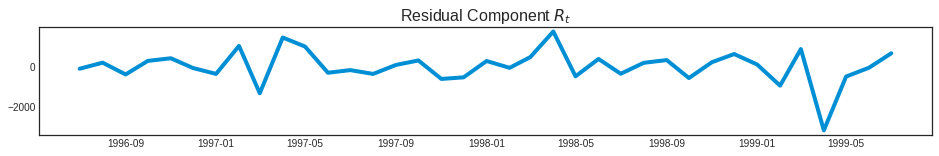

In [15]:
# plotting residual component:
plt.figure(figsize = (16,2))

plt.plot(result.resid,linewidth = 4, color="#008fd5")
plt.title('Residual Component $R_t$', size = 16)
plt.savefig('img/residual_component.png')
# plt.yticks([-7500,-5000,-2500,0,2500,5000,7500,10000],
#            ['0','2,000','4,000','6,000','8,000','10,000','12,000'], size = 12)
# plt.xticks([5,10,15,20,25],
#             ['June 2013','November 2013','April 2014','September 2014','February 2015'], size = 12)

## **Differencing:**

In [16]:
test = cut_trout_sales_df.diff()[1:]

## **Testing for Stationarity:**

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
adfuller_test(test)

ADF Test Statistic : -9.15680628483947
p-value : 2.5965474502657657e-15
#Lags Used : 10
Number of Observations Used : 37
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# **ARIMA/SARIMA implementation:**

## For **Non-Seasonal** data, **ARIMA** model can be used with 3 components: p, d, q:

### **p** - comes from **AR** (auto-regression) model and Partial Autocorrelation (PACF. The number of lag observations included in the model, also                   called the lag order. **AR** model - Autocorrelation (linear combination of noise)

### **d** - Number of times differencing must be done to stationarize series, also called the degree of differencing. 

### **q** - comes from **MA** (moving average) model and Autocorrelation (ACF). The size of the moving average window, also called the order of moving               average. **MA** model - Autocorrelation (linear combination of noise)

## For **Seasonal** data (if seasonality was obseved in the seasonal component) **SARIMA** model can be used with 1 more component has to be concidered for analysis: 

### **P** comes form AR (partial) how many spikes are out of the zone every 8 times. 8 comes from MA where every 8 steps there is a spike.



### **s** - Indicates seasonal length in the data

## **AR** model - Partial Autocorrelation (linear combination of previous observations):
## **MA** model - Autocorrelation (linear combination of noise):

In [20]:
import statsmodels.api as sm

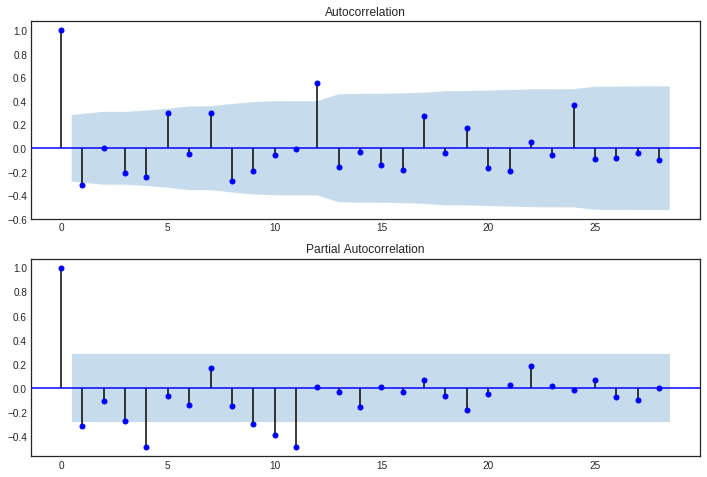

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(test,lags=28,ax=ax1, color = 'b')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(test,lags=28,ax=ax2,method='ywmle',color = 'b')
plt.savefig('img/acf_pacf.png')

## **Splitting Data into Training and Testing sets:**

In [22]:
# train_data = cut_trout_sales_df[:'1999-7-1']
# test_data = cut_trout_sales_df['1999-8-1':]

In [23]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

train_data = cut_trout_sales_df[:train_end]
test_data = cut_trout_sales_df[train_end + timedelta(days=1):test_end]

# **Fitting SARIMA Model:**

In [24]:
order = (1,1,1)
seasonal_order = (1, 0, 3, 12)
# define model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)

/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [25]:
#fiting the model:
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model Fitting Time: 3.177152633666992


In [26]:
#summary of the model
print(model_fit.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                      sales   No. Observations:                   43
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -393.580
Date:                                    Mon, 15 Jun 2020   AIC                            801.161
Time:                                            16:54:05   BIC                            813.324
Sample:                                        01-01-1996   HQIC                           805.619
                                             - 07-01-1999                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4779      0.318     -1.502      0

In [27]:
#getting predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions)
residuals = test_data.sales - predictions

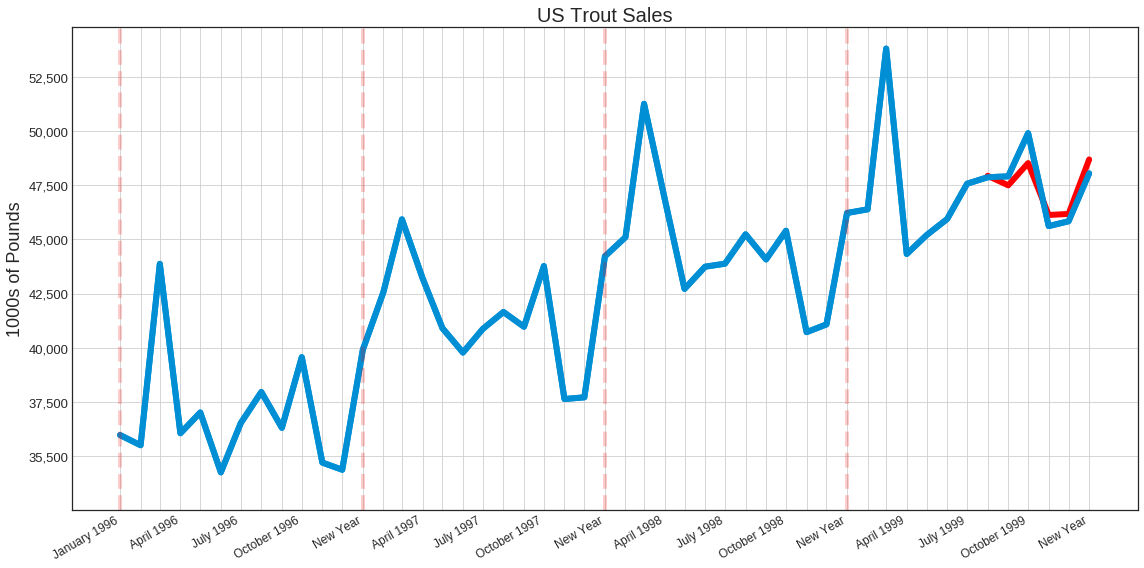

In [28]:
#from matplotlib import pyplot as plt
# print(plt.style.available)
plt.figure(figsize = (16,8))
plt.style.use('seaborn-white')

y1 = cut_trout_sales_df
y2 = predictions
plt.plot(y1, linewidth = 6, color="#008fd5")
plt.plot(y2, linewidth = 6, color="r")

plt.plot( y, linewidth = 6, color="#008fd5")

plt.ylabel("1000s of Pounds", size = 18)
plt.yticks([35000,37500,40000,42500,45000,47500,50000,52500,55000],
           ['','35,500','37,500','40,000','42,500','45,000','47,500','50,000','52,500','55,000'], size = 13)
plt.xticks(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01', '1999-11-01', '1999-12-01',
               '2000-01-01'],
           ['January 1996','','','April 1996','','','July 1996','','','October 1996','','','New Year','','','April 1997', '','','July 1997',
            '','','October 1997', '','','New Year', '','','April 1998','','','July 1998',
            '','','October 1998', '','','New Year','','','April 1999', '','','July 1999',
            '','','October 1999', '','','New Year', ''], size = 12)
plt.title("US Trout Sales", size = 20)

plt.gcf().autofmt_xdate()
plt.grid(True)

plt.tight_layout()
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linewidth=4, color='r', linestyle='--', alpha=0.2)
plt.savefig('img/sarima.png')

plt.show()

# DOCS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html


## **Plotting the Residuals:**

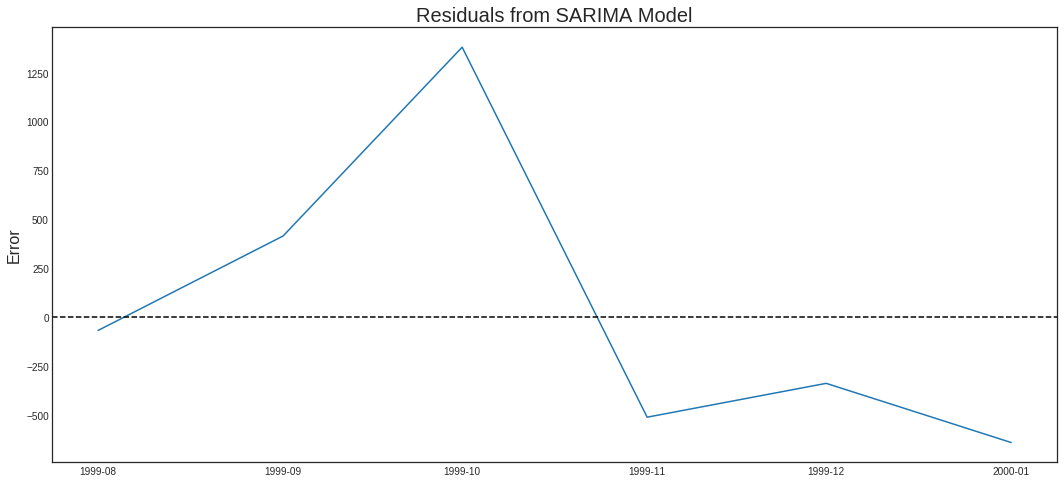

In [29]:
plt.figure(figsize=(18,8))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.savefig('img/sarima_residuals.png')

## **Evaluating the Model:**

In [30]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.sales)),4))

Mean Absolute Percent Error: 0.011


In [31]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 691.9591131854805


In [32]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = cut_trout_sales_df[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/anton/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No

In [33]:
rolling_predictions

,sales,1999-08-01 00:00:00,1999-09-01 00:00:00,1999-10-01 00:00:00,1999-11-01 00:00:00,1999-12-01 00:00:00,2000-01-01 00:00:00
date,,,,,,,
1999-08-01,50372,50440.291777,NaN,NaN,NaN,NaN,NaN
1999-09-01,50414,NaN,50105.466231,NaN,NaN,NaN,NaN
1999-10-01,52407,NaN,NaN,51715.009112,NaN,NaN,NaN
1999-11-01,48118,NaN,NaN,NaN,49303.825238,NaN,NaN
1999-12-01,48341,NaN,NaN,NaN,NaN,48612.28961,NaN
2000-01-01,50552,NaN,NaN,NaN,NaN,NaN,50798.260573


In [34]:
lst = []
for i in range(len(rolling_predictions)):
     lst.append(rolling_predictions.iloc[i][i+1])
lst   

[50440.291776631515,
 50105.46623063771,
 51715.009111565014,
 49303.825237940575,
 48612.28960967879,
 50798.26057316257]

In [35]:
rolling_predictions['sales1'] = lst

In [36]:
rolling_residuals = test_data.sales - rolling_predictions.sales1

In [38]:
rolling_residuals

date
1999-08-01     -68.291777
1999-09-01     308.533769
1999-10-01     691.990888
1999-11-01   -1185.825238
1999-12-01    -271.289610
2000-01-01    -246.260573
dtype: float64

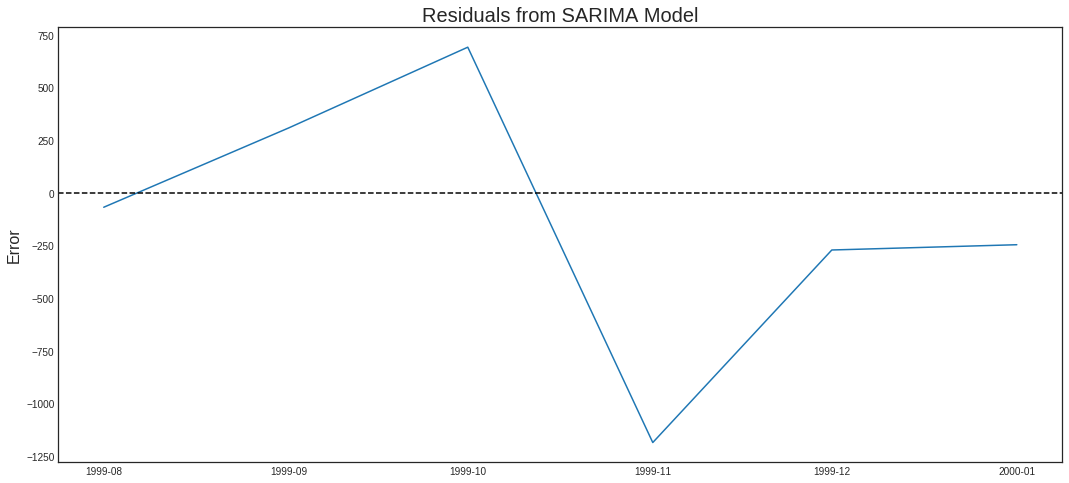

In [39]:
plt.figure(figsize=(18,8))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.savefig('img/rolling_residuals.png')

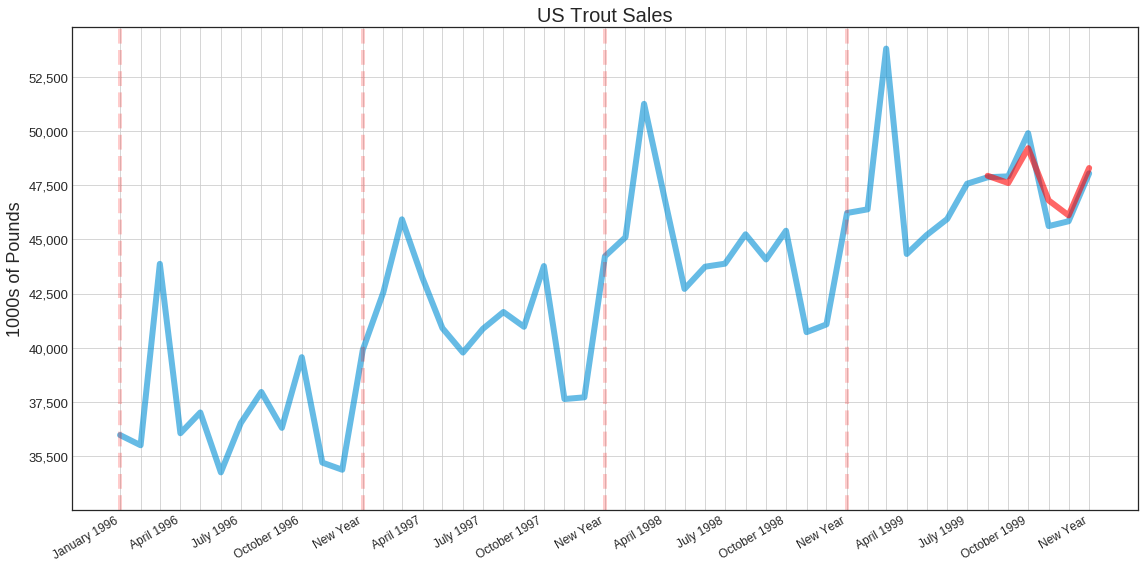

In [40]:
#from matplotlib import pyplot as plt
# print(plt.style.available)
plt.figure(figsize = (16,8))
plt.style.use('seaborn-white')

y1 = cut_trout_sales_df
y2 = rolling_predictions.sales1
plt.plot(y1, linewidth = 6, color="#008fd5", alpha = 0.6)
plt.plot(y2, linewidth = 6, color="r", alpha = 0.6)

#plt.plot( y, linewidth = 6, color="#008fd5")

plt.ylabel("1000s of Pounds", size = 18)
plt.yticks([35000,37500,40000,42500,45000,47500,50000,52500,55000],
           ['','35,500','37,500','40,000','42,500','45,000','47,500','50,000','52,500','55,000'], size = 13)
plt.xticks(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01', '1999-11-01', '1999-12-01',
               '2000-01-01'],
           ['January 1996','','','April 1996','','','July 1996','','','October 1996','','','New Year','','','April 1997', '','','July 1997',
            '','','October 1997', '','','New Year', '','','April 1998','','','July 1998',
            '','','October 1998', '','','New Year','','','April 1999', '','','July 1999',
            '','','October 1999', '','','New Year', ''], size = 12)
plt.title("US Trout Sales", size = 20)

plt.gcf().autofmt_xdate()
plt.grid(True)

plt.tight_layout()
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linewidth=4, color='r', linestyle='--', alpha=0.2)
plt.savefig('img/rolling_sarima.png')


plt.show()

# DOCS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html


In [41]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data.sales)),4))

Mean Absolute Percent Error: 0.0093


In [42]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 594.2967917940615


## **Exponential Smoothing for Time Series Forecasting Model (ETS):**

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
cut_trout_sales_df.index.freq = 'MS'

In [45]:
cut_trout_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 1996-01-01 to 2000-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   49 non-null     int64
dtypes: int64(1)
memory usage: 2.0 KB


### Splitting the Data:

In [46]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

train_data = cut_trout_sales_df[:train_end]
test_data = cut_trout_sales_df[train_end + timedelta(days=1):test_end]

In [47]:
model = ExponentialSmoothing(train_data,trend='add',
    seasonal='add',
    seasonal_periods=12,
    dates=None,
    freq=None,
    missing='none',)

In [48]:
#fiting the model:
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.26688408851623535


In [49]:
#summary of the model
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   43
Model:             ExponentialSmoothing   SSE                       66774609.456
Optimized:                         True   AIC                            644.992
Trend:                         Additive   BIC                            673.171
Seasonal:                      Additive   AICC                           673.492
Seasonal Periods:                    12   Date:                 Mon, 15 Jun 2020
Box-Cox:                          False   Time:                         16:57:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3667773                alpha                 True
smoothing_slope          

In [50]:
#getting predictions and residuals
predictions = model_fit.forecast(6)
predictions = pd.Series(predictions)
residuals = test_data.sales - predictions

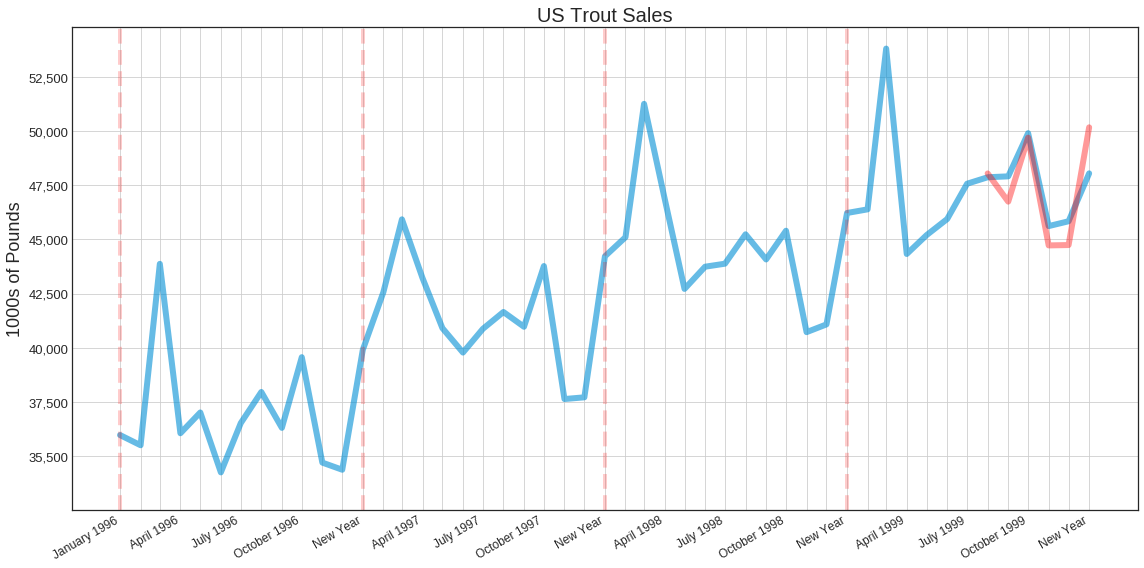

In [51]:
#from matplotlib import pyplot as plt
# print(plt.style.available)
plt.figure(figsize = (16,8))
plt.style.use('seaborn-white')

y1 = cut_trout_sales_df
y2 = predictions
plt.plot(y1, linewidth = 6, color="#008fd5", alpha = 0.6)
plt.plot(y2, linewidth = 6, color="r", alpha = 0.4)

plt.ylabel("1000s of Pounds", size = 18)
plt.yticks([35000,37500,40000,42500,45000,47500,50000,52500,55000],
           ['','35,500','37,500','40,000','42,500','45,000','47,500','50,000','52,500','55,000'], size = 13)
plt.xticks(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01', '1999-11-01', '1999-12-01',
               '2000-01-01'],
           ['January 1996','','','April 1996','','','July 1996','','','October 1996','','','New Year','','','April 1997', '','','July 1997',
            '','','October 1997', '','','New Year', '','','April 1998','','','July 1998',
            '','','October 1998', '','','New Year','','','April 1999', '','','July 1999',
            '','','October 1999', '','','New Year', ''], size = 12)
plt.title("US Trout Sales", size = 20)

plt.gcf().autofmt_xdate()
plt.grid(True)

plt.tight_layout()
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linewidth=4, color='r', linestyle='--', alpha=0.2)
plt.savefig('img/ets.png')

plt.show()

# DOCS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

## **Evaluating the Model:**

In [52]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.sales)),4))

Mean Absolute Percent Error: 0.019


In [53]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1150.852583816602


## **Recurrent Neural Network:**

In [54]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline

/home/anton/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/anton/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/anton/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/anton/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

## **Splitting the Data:**

In [55]:
scalar = MinMaxScaler()
train_scalar = scalar.fit_transform(train_data)
test_scalar = scalar.fit_transform(test_data)

In [56]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

train_data = cut_trout_sales_df[:train_end]
test_data = cut_trout_sales_df[train_end + timedelta(days=1):test_end]

In [57]:
train_data.shape

(43, 1)

## **Batch Function:**

In [58]:
# Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration. 
# The batch size can be one of three options: 
# batch mode -  where the batch size is equal to the total dataset
# mini-batch mode - where the batch size is greater than one but less than the total dataset size
# stochastic mode - where the batch size is equal to one

# steps - number of points for prediction
def next_batch(training_data, batch_size, steps):
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    
    x_batch = y_batch[:, :-1].reshape(-1, steps, 1)    # Date  Shape Batch Timestep inputdim
    y_batch = y_batch[:, 1:].reshape(-1, steps, 1)     # Price STock
    return x_batch , y_batch

## **RNN Model:**

In [59]:
scalar = MinMaxScaler()
train_scalar = scalar.fit_transform(train_data)
test_scalar = scalar.fit_transform(test_data)

In [60]:
# hyper parameters:
# num_inputs - only one feature (time series in this case)
num_inputs = 1
# num_time_steps - unmber of month to be predicted (6 to combare with the original data, more for future predictions)
num_time_steps = 6
num_neurons = 100
# num_outputs = 1 because only predicting sales 
num_outputs = 1
learning_rate = 0.01 
num_train_iterations = 100
# batch_size - tunable number 
batch_size = 43

In [66]:
# activation parameter is tunable 
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])


# Also play around with GRUCell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.GRUCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)

output, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

loss = tf.reduce_mean(tf.square(output - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

saver = tf.train.Saver()


with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_data, batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
        saver.save(sess, "./truot_sales")

0 	MSE: 1636774900.0


In [67]:
results = scalar.inverse_transform(np.array(train_seed[6:]).reshape(6,1))

NameError: name 'train_seed' is not defined

In [63]:
type(results)

NameError: name 'results' is not defined

In [64]:
results

NameError: name 'results' is not defined

In [68]:
actual_predictions = [48094.18074042,42989.44729599,42155.23274571,42442.79383686,48845.07449798,41672.63915959]

In [69]:
test_data

,sales
date,
1999-08-01,50372
1999-09-01,50414
1999-10-01,52407
1999-11-01,48118
1999-12-01,48341
2000-01-01,50552


In [70]:
test_data['predictions'] = np.array(actual_predictions)

/home/anton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


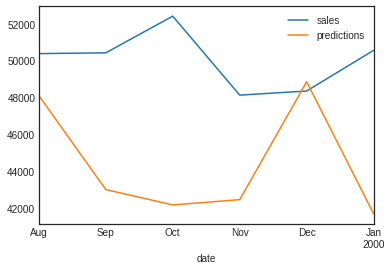

In [71]:
test_data.plot()

## **Evaluating the RNN Model:**

In [72]:
residuals = test_data.sales - test_data.predictions

In [73]:
test_data['residuals'] = residuals

/home/anton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
test_data

,sales,predictions,residuals
date,,,
1999-08-01,50372,48094.180740,2277.819260
1999-09-01,50414,42989.447296,7424.552704
1999-10-01,52407,42155.232746,10251.767254
1999-11-01,48118,42442.793837,5675.206163
1999-12-01,48341,48845.074498,-504.074498
2000-01-01,50552,41672.639160,8879.360840


In [75]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.sales)),4))

Mean Absolute Percent Error: 0.1154


In [76]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 6791.1250945373695


In [79]:
test_data.predictions

date
1999-08-01    48094.180740
1999-09-01    42989.447296
1999-10-01    42155.232746
1999-11-01    42442.793837
1999-12-01    48845.074498
2000-01-01    41672.639160
Freq: MS, Name: predictions, dtype: float64

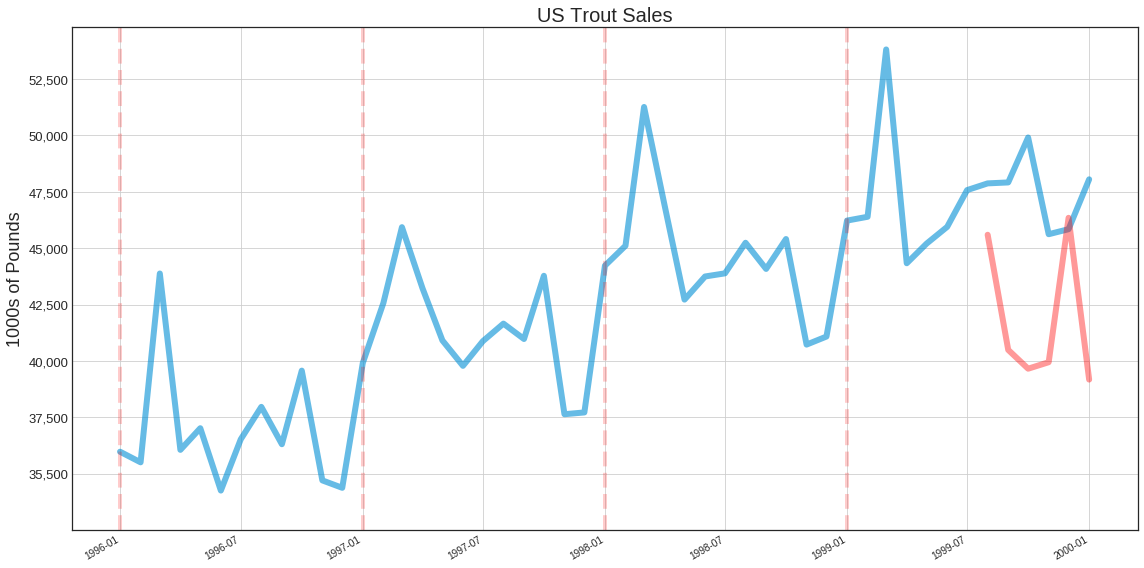

In [81]:
#from matplotlib import pyplot as plt
# print(plt.style.available)
plt.figure(figsize = (16,8))
plt.style.use('seaborn-white')

y1 = cut_trout_sales_df
y2 = test_data.predictions
plt.plot(y1, linewidth = 6, color="#008fd5", alpha = 0.6)
plt.plot(y2, linewidth = 6, color="r", alpha = 0.4)

plt.ylabel("1000s of Pounds", size = 18)
plt.yticks([35000,37500,40000,42500,45000,47500,50000,52500,55000],
           ['','35,500','37,500','40,000','42,500','45,000','47,500','50,000','52,500','55,000'], size = 13)

plt.title("US Trout Sales", size = 20)

plt.gcf().autofmt_xdate()
plt.grid(True)

plt.tight_layout()
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linewidth=4, color='r', linestyle='--', alpha=0.2)
plt.savefig('img/lstm.png')

plt.show()

# DOCS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

## **Long Short-Term Memory (LSTM) Model:**

In [82]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
test_data_size = 6

train_data = cut_trout_sales_df[:-test_data_size]
test_data = cut_trout_sales_df[-test_data_size:]

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data.values.reshape(-1, 1))

In [85]:
scalar = MinMaxScaler(feature_range = (0, 1))
train_scalar = scalar.fit_transform(train_data)
test_scalar = scalar.fit_transform(test_data)

In [86]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.82380612]
 [-0.87197055]
 [-0.01585029]
 [-0.8154208 ]
 [-0.71725125]]
[[1.        ]
 [0.03057572]
 [0.11984866]
 [0.19572553]
 [0.36230698]]


In [87]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [88]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [89]:
train_inout_seq = create_inout_sequences(train_data_normalized, 12)

In [90]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [91]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [92]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [93]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.13499267
epoch:  26 loss: 0.03302617
epoch:  51 loss: 0.05612472
epoch:  76 loss: 0.01599790
epoch: 101 loss: 0.01530087
epoch: 126 loss: 0.00140532
epoch: 149 loss: 0.0027333894


In [94]:
train_window = 12
fut_pred = 6

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.12353001534938812, 0.004908477421849966, 0.1404028981924057, -0.33817362785339355, -0.30166682600975037, 0.2241538017988205, 0.241333469748497, 1.0, 0.030575724318623543, 0.11984865367412567, 0.19572553038597107, 0.36230698227882385]


In [95]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [96]:
test_inputs[fut_pred:]

[0.241333469748497,
 1.0,
 0.030575724318623543,
 0.11984865367412567,
 0.19572553038597107,
 0.36230698227882385,
 0.21755315363407135,
 0.3248329162597656,
 0.35052651166915894,
 0.2759361267089844,
 0.28716403245925903,
 0.32945603132247925]

In [97]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[48658.45228939]
 [49707.5410881 ]
 [49958.79875761]
 [49229.37938309]
 [49339.17707342]
 [49752.7505303 ]]


In [98]:
list(actual_predictions)

[array([48658.45228939]),
 array([49707.5410881]),
 array([49958.79875761]),
 array([49229.37938309]),
 array([49339.17707342]),
 array([49752.7505303])]

In [99]:
test_data['predictions'] = actual_predictions

/home/anton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
test_data

,sales,predictions
date,,
1999-08-01,50372,48658.452289
1999-09-01,50414,49707.541088
1999-10-01,52407,49958.798758
1999-11-01,48118,49229.379383
1999-12-01,48341,49339.177073
2000-01-01,50552,49752.750530


## **Evaluating the LSTM Model:**

In [101]:
residuals = test_data.sales - test_data.predictions

In [102]:
test_data['residuals'] = residuals

/home/anton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.sales)),4))

Mean Absolute Percent Error: 0.0257


In [104]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1431.7437265930353


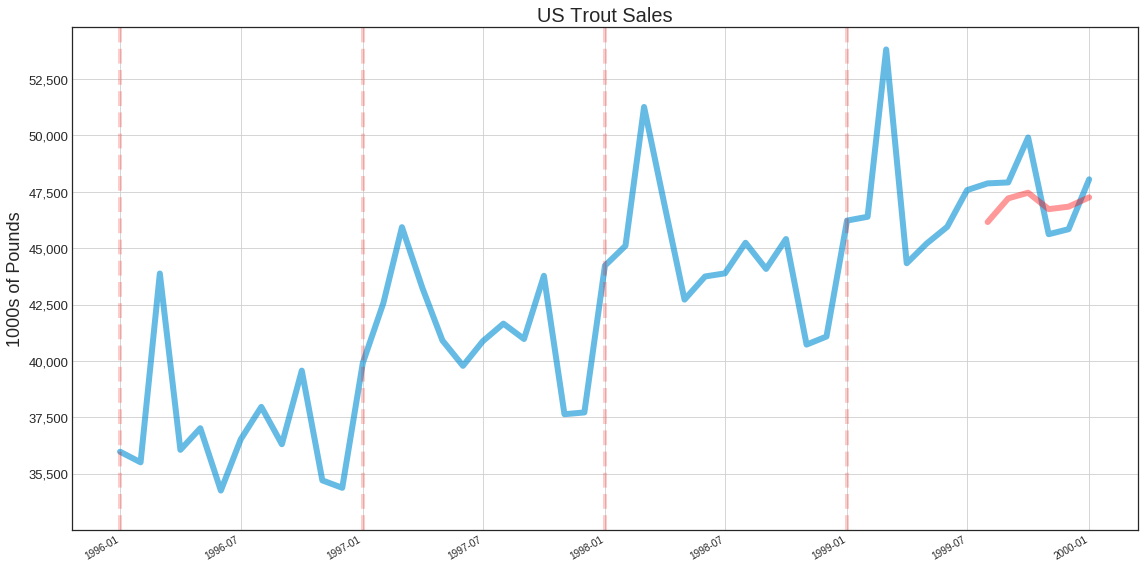

In [106]:
#from matplotlib import pyplot as plt
# print(plt.style.available)
plt.figure(figsize = (16,8))
plt.style.use('seaborn-white')

y1 = cut_trout_sales_df
y2 = test_data.predictions
plt.plot(y1, linewidth = 6, color="#008fd5", alpha = 0.6)
plt.plot(y2, linewidth = 6, color="r", alpha = 0.4)

plt.ylabel("1000s of Pounds", size = 18)
plt.yticks([35000,37500,40000,42500,45000,47500,50000,52500,55000],
           ['','35,500','37,500','40,000','42,500','45,000','47,500','50,000','52,500','55,000'], size = 13)

plt.title("US Trout Sales", size = 20)

plt.gcf().autofmt_xdate()
plt.grid(True)

plt.tight_layout()
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linewidth=4, color='r', linestyle='--', alpha=0.2)
plt.savefig('img/rnn.png')

plt.show()

# DOCS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html